# CPS 840 / CP 8318
# Assignment 1 - Mary Abdelnour - 500648395
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


MSE: 2548.07
Variance: 0.47
w0: 152.92
w1: 938.24


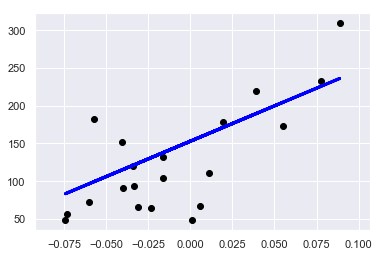

In [235]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20][:,0]
diabetes_X_test = diabetes_X[-20:][:,0]

# Split the target into training/testing sets
diabetes_Y_train = diabetes.target[:-20]
diabetes_Y_test = diabetes.target[-20:]

def linear_reg(X, ytrue, max_iter = 100000, learn_rate = 0.1):
    w0 = 0; w1 = 1; i = 0; N=float(len(X))
    while i < max_iter:
        w1 = w1 - (learn_rate/N)*sum(X * (((w1*X) + w0) - ytrue))
        w0 = w0 - (learn_rate/N)*sum(((w1*X) + w0) - ytrue)
        i += 1
    return w0, w1

def modelpred(w0, w1, X):
    return (w1*X) + w0

w0, w1 = linear_reg(diabetes_X_train, diabetes_Y_train)
pred = modelpred(w0,w1,diabetes_X_test)


print("MSE: %.2f" % (mean_squared_error(diabetes_Y_test, pred)))
print('Variance: %.2f' % r2_score(diabetes_Y_test, pred))
print("w0: %.2f" % w0)
print("w1: %.2f" % w1)

plt.scatter(diabetes_X_test, diabetes_Y_test,  color='black')
plt.plot(diabetes_X_test, pred, color='blue', linewidth=3)

plt.show()

[2 Marks]
# b/c

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation:
All processing done in part c, everything loaded in part b

In [236]:
### An example to load a csv file
import pandas as pd 
import numpy as np
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

Organize the data into relevant features for predicting revenue. <br>
i.  Explain your feature sets and organization. <br>

I chose popularity, vote_average, and budget as features.
I assigned all values with 0 to NaN and deleted any rows that had NaN values.
This is because the 0 values are unimportant when trying to predict success.
I chose these because I believe they have the most impact on revenue.
I created a sub-dataframe of the features, and split the training and testing data such that there was a lot of data to train with, but still enough to test with.

ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. <br>

Generally speaking, the higher the rating, the more revenue the movies have.

iii. Visualize any other relationships you deem interesting and explain. <br>

I find it interesting that some of the highest rated movies have very low revenues.


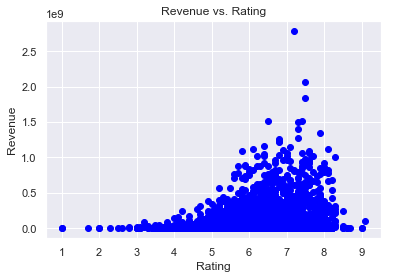

In [285]:
new = meta_data[['popularity', 'vote_average', 'budget', 'revenue']].copy()
new.budget = pd.to_numeric(new.budget, errors='coerce')
new.replace(0, np.nan, inplace=True)
new = new.dropna(how='any')
revenue = new['revenue']
new = new.drop(columns = ['revenue'])

split = int(len(new)*0.9)

features_train = new[:split]
features_test = new[split:]

revenue_train = revenue[:split]
revenue_test = revenue[split:]

plt.title("Revenue vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.scatter(new['vote_average'].values, revenue, color='blue')


[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

MSE: 10554815298387946.00
Variance: 0.58


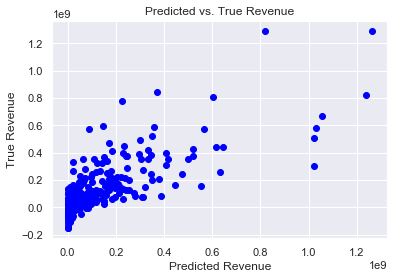

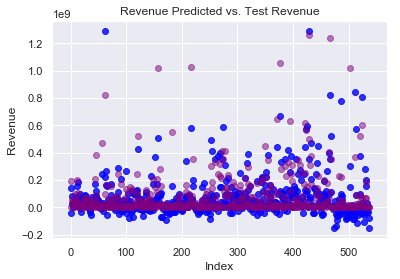

In [286]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.
import matplotlib.pyplot as plt
regr = linear_model.LinearRegression()
regr.fit(features_train, revenue_train)
revenue_pred = regr.predict(features_test)

print("MSE: %.2f" % (mean_squared_error(revenue_test, revenue_pred)))
print('Variance: %.2f' % r2_score(revenue_test, revenue_pred))

plt.title("Predicted vs. True Revenue")
plt.xlabel("Predicted Revenue")
plt.ylabel("True Revenue")
plt.scatter(revenue_test.values, revenue_pred,  color='blue')
plt.show()

plt.title("Revenue Predicted vs. Test Revenue")
plt.xlabel("Index")
plt.ylabel("Revenue")
plt.scatter(range(len(revenue_pred)), revenue_pred, color='blue',alpha=0.8)
plt.scatter(range(len(revenue_pred)), revenue_test.values, color='purple',alpha=0.5)

plt.show()

[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)

MSE: 10195933224190260.00
Variance: 0.59


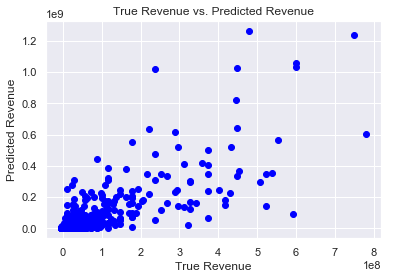

In [287]:
from sklearn.linear_model import Ridge
'''- Using large alpha, because cost function includes 1/alpha, 
and if alpha is extremely large, 1/alpha approaches 0.
- lim(cost) approaches infinity makes lim(alpha) approach 0, 
makes cost function become standard error function
- Do not need to normalize, does not make big difference'''

regr = Ridge(alpha=100000000000, normalize=False)
regr.fit(features_train, revenue_train)
pred = regr.predict(features_test)

print("MSE: %.2f" % (mean_squared_error(revenue_test, pred)))
print('Variance: %.2f' % r2_score(revenue_test, pred))

plt.title("True Revenue vs. Predicted Revenue")
plt.xlabel("True Revenue")
plt.ylabel("Predicted Revenue")
plt.scatter(pred, revenue_test.values,  color='blue')

MSE: 10554690727332282.00
Variance: 0.58


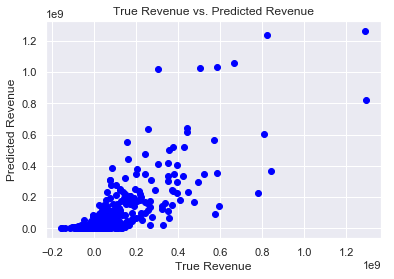

In [289]:
##### YOUR CODE HERE WITH REGULARIZATION #######
'''Using small alpha, opposite reason as in code without regularization
We don't need to normalize, will not make big difference'''
regr = Ridge(alpha=1)
regr.fit(features_train, revenue_train)
pred = regr.predict(features_test)

print("MSE: %.2f" % (mean_squared_error(revenue_test, pred)))
print('Variance: %.2f' % r2_score(revenue_test, pred))

plt.title("True Revenue vs. Predicted Revenue")
plt.xlabel("True Revenue")
plt.ylabel("Predicted Revenue")
plt.scatter(pred, revenue_test.values,  color='blue')


## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

[array([-0.00632763,  3.96782089]), array([-0.00632763,  3.96782089]), array([-0.00632763,  3.96782089]), array([-0.00632763,  3.96782089])]


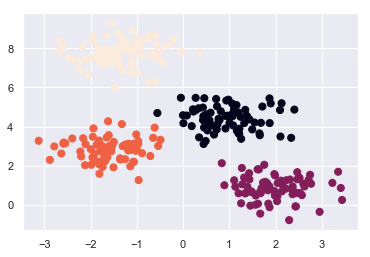

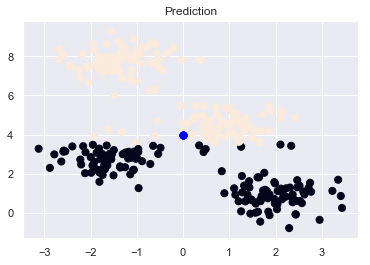

In [1]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
import random

# Generate Samples
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_true);

#determine random centers
#assign each point to the clusters based on the minimum distance to the cluster center
#new center = sum(blue cluster points)/total number of points

def init_centroids(X, centers):
    max_size = [X[:,i].max() for i in range(X.shape[1])]
    min_size = [X[:,i].min() for i in range(X.shape[1])]
    center = []
    for i in range(centers):
        mini = int((0.2)*min_size[0])
        maxi = int((0.8)*max_size[0])
        x = random.randint(mini, maxi)
        center.append([x])
        for j in range(1):
            mini1 = int((0.2)*min_size[1])
            maxi1 = int((0.8)*max_size[1])
            y = random.randint(mini1, maxi1)
            center[i].append(x+y)
    return center

def iterations(X, centers, center, y_true):
    old_center = []
    while np.array_equal(old_center, center) != True:
        old_center = center
        #generating clusters
        a = []
        for i in range(len(X)):
            for j in range(centers):
                a.append(np.mean(np.sqrt(((center[j] - X[i])**2))))
            b = np.argmin(a) 
            a = []
            y_true[i] = b
        
        #recalculating centers
        for i in range(centers):
            N = len(X)
            index = np.where(y_true == 1)
            center[i] = (1/N)*sum(X)
        return X, y_true, center
centers = 4
center = init_centroids(X, centers)
X, y_pred, center = iterations(X, centers, center, y_true)
print(center)
plt.figure(2)
plt.title("Prediction")
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_pred);
i=0
for i in range(centers):
    plt.plot(center[i][0], center[i][1], marker='o', markersize=7, color="blue");
    i += 1
#plt.scatter(center[:, 0], center[:, 1], c='blue', s=200, alpha=0.5)



# Uncomment to display clusters and cluster centers
#plt.scatter(X[:, 0], X[:, 1], c=labels,
#            s=50, cmap='viridis');
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [282]:
# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)
mystery = np.load('mystery.npy')
mystery.shape
clusters = KMeans(n_clusters=6).fit(mystery)

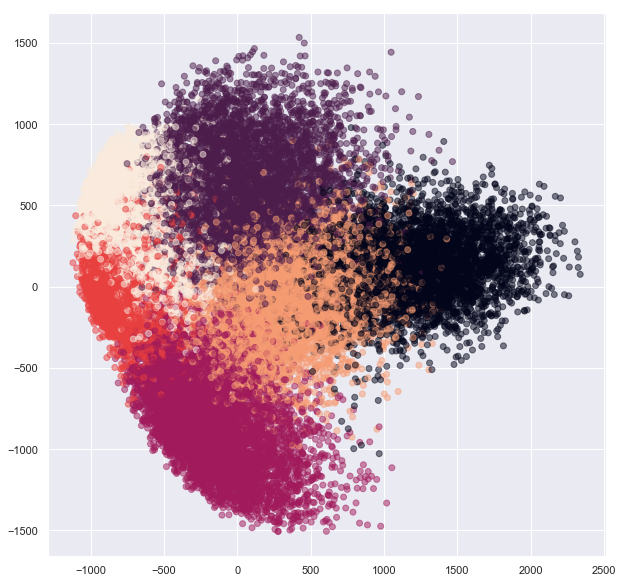

In [283]:
from sklearn.decomposition import PCA as sklearnPCA
# Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.
sklearn_pca = sklearnPCA(n_components = 2)
Y = sklearn_pca.fit_transform(mystery)

plt.figure(figsize=(10,10))
plt.scatter(Y[:, 0], Y[:, 1], c= clusters.labels_, alpha=0.5);

Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.

I see 6 clusters.

(any additional code supporting your assertion on the number of clusters may be included below)

In [27]:
##### YOUR (OPTIONAL) CODE HERE #######

[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.

In [28]:
##### YOUR (OPTIONAL) CODE HERE #######

[10 Marks]
# CP 8318 Questions

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

YOUR EXPLANATION HERE, provide an example for one user id below.

In [29]:
##### YOUR CODE HERE #######
